# **Exploração e análise de dados de crédito com SQL**

Este notebook faz parte do curso SQL para Análise de Dados da EBAC e visa explorar informações de clientes de um banco para gerar insights estratégicos.

# Os dados:

Os dados utilizados representam informações detalhadas sobre os perfis financeiros de clientes de um banco, com as seguintes variáveis relevantes:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# Exploração de dados:

Vamos começar entendendo o tamanho e a estrutura dos nossos dados antes de explorarmos suas categorias.

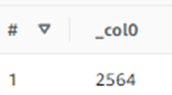

> Resposta: 2564 linhas

**ps.:** A base de dados do link acima contém mais linhas do que a seleção utilizada. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Mas existem limites financeiros na qual a redução de dados para análise para fins de estudo se torna interessante.

**Como são os dados**

Query: 

SELECT * FROM credito LIMIT 10;

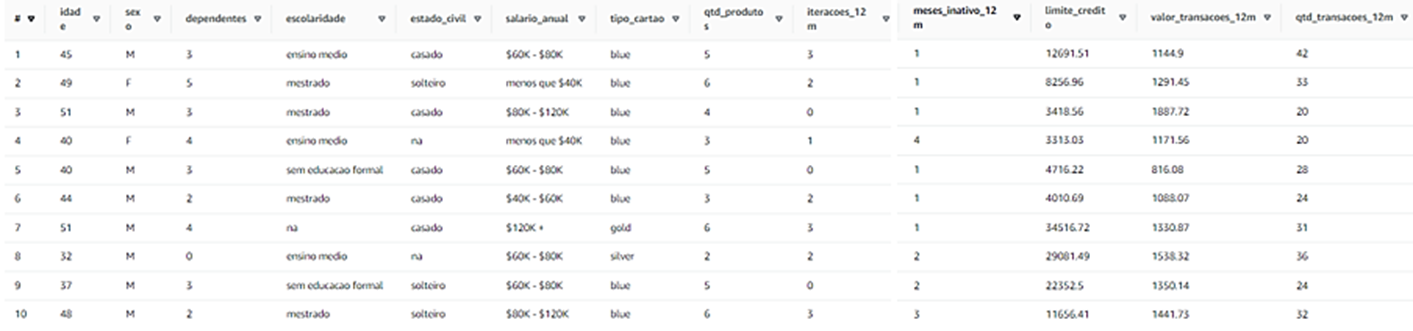

**Quais os tipos de cada dado**

Query: 

DESCRIBE credito

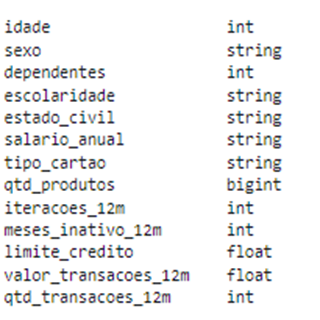


# Agora que ja entendemos quais são os tipos de dados, vamos olhar mais atentamente as categorias de algumas das variáveis.



**Quais são os tipos de escolaridade disponíveis no dataset?**

Query: 

SELECT DISTINCT escolaridade FROM credito

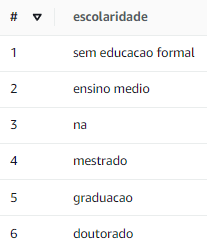

**Quais são os tipos de estado_civil disponíveis no dataset?**

Query: 

SELECT DISTINCT estado_civil FROM credito

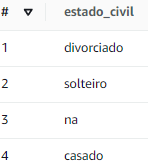

**Quais são os tipos de salario_anual disponíveis no dataset?**

Query: 

SELECT DISTINCT salario_anual FROM credito

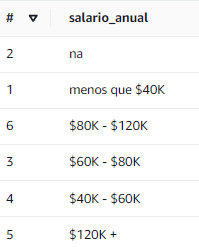

**Quais são os tipos de cartão disponíveis no dataset?**

Query: 

SELECT DISTINCT tipo_cartao FROM credito

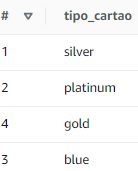

> É possível perceber que temos valores nulos (na) no dataset, trataremos isso mais tarde!
______________________________________________________________________________________________________________________________________

> **Análise de dados**

**Com a estrutura do dataset mais clara, aqui estão alguns insights que iremos explorar:**

* **1) Distribuição dos Limites de Crédito por Escolaridade e Tipo de Cartão:**
Analisaremos os maiores e menores limites de crédito com base na escolaridade e no tipo de cartão. Isso pode mostrar se há padrões entre o nível de escolaridade e o acesso a maiores limites.

* **2) Comparação de Gasto Médio Anual por Sexo:**
Verificaremos o valor médio das transações nos últimos 12 meses para cada sexo. Essa análise pode revelar diferenças de comportamento financeiro.

* **3) Relação entre Renda Anual e Número de Produtos:**
Agruparemos por faixas de salário anual e calcule a média de produtos adquiridos. Isso pode indicar se pessoas com maior poder aquisitivo tendem a usar mais produtos do banco.

* **4) Identificação dos Grupos mais Inativos:**
Analisaremos a inatividade (meses sem transações) com base em variáveis como escolaridade, estado civil e sexo. Essa análise pode ajudar a entender perfis de clientes com baixa atividade.

* **5) Segmentação por Escolaridade e Cartão:**
Verificaremos como diferentes níveis de escolaridade e tipos de cartão afetam o volume de transações. Isso pode revelar padrões úteis para estratégias de marketing.

* **6) Distribuição de Faixas Salariais por Sexo:**
Analisaremos a distribuição das faixas salariais considerando o sexo. Isso pode destacar possíveis diferenças econômicas entre os gêneros.

* **7) Correlação entre Número de Dependentes e Limite de Crédito:**
Avaliaremos se há uma relação entre o número de dependentes e o limite de crédito concedido. Isso pode indicar se clientes com mais responsabilidades financeiras recebem limites maiores.

_____________________________________________________________________________________________________________________________________

* **1) Distribuição dos Limites de Crédito por Escolaridade e Tipo de Cartão:**

Query: 

SELECT escolaridade, tipo_cartao, MAX(limite_credito) AS max_limite, MIN(limite_credito) AS min_limite, AVG(limite_credito) AS media_limite
FROM credito
WHERE escolaridade IS NOT NULL AND tipo_cartao IS NOT NULL
GROUP BY escolaridade, tipo_cartao
ORDER BY AVG(limite_credito) DESC;

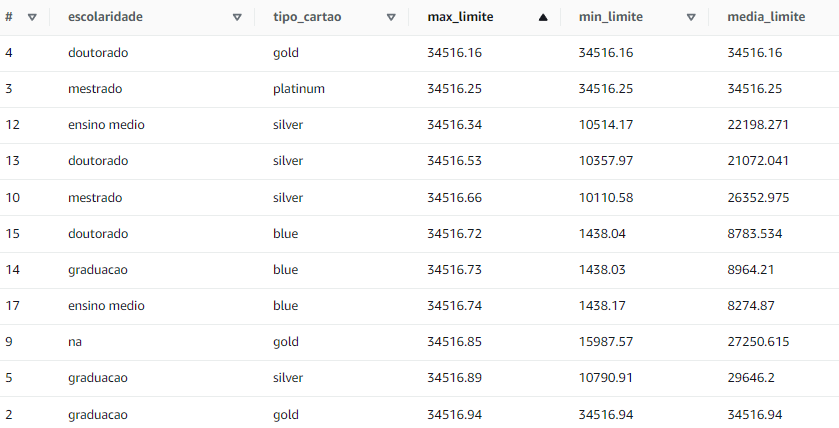

> Essa análise sugere que a escolaridade não exerce grande impacto no limite de crédito, mas os maiores limites estão, de fato, associados a cartões premium, sugerindo uma segmentação por perfil socioeconômico.


* **2) Comparação de Gasto Médio Anual por Sexo:**

Query:

SELECT sexo, AVG(valor_transacoes_12m) AS media_gasto_anual
FROM credito
WHERE sexo IS NOT NULL AND valor_transacoes_12m IS NOT NULL
GROUP BY sexo;

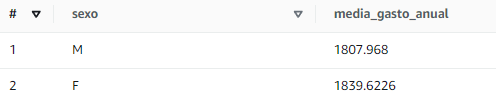

> Os gastos de homens e mulheres são similares!

* **3) Relação entre Renda Anual e Número de Produtos:**

Query:

SELECT salario_anual, AVG(qtd_produtos) AS media_produtos
FROM credito
WHERE salario_anual IS NOT NULL AND qtd_produtos IS NOT NULL
GROUP BY salario_anual
ORDER BY AVG(qtd_produtos) DESC;

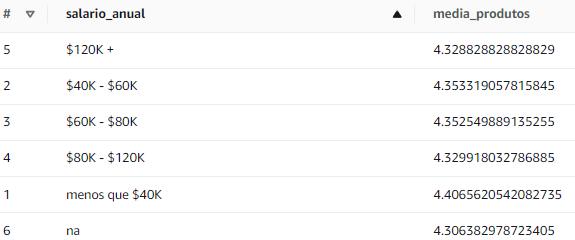

> Pessoas com maior poder aquisitivo NÃO tendem a usar mais produtos do banco.

* **4) Identificação dos Grupos mais Inativos:**

Query:

SELECT escolaridade, estado_civil, sexo, AVG(meses_inativo_12m) AS media_inatividade
FROM credito
WHERE escolaridade IS NOT NULL AND estado_civil IS NOT NULL AND sexo IS NOT NULL
GROUP BY escolaridade, estado_civil, sexo
ORDER BY AVG(meses_inativo_12m) DESC;

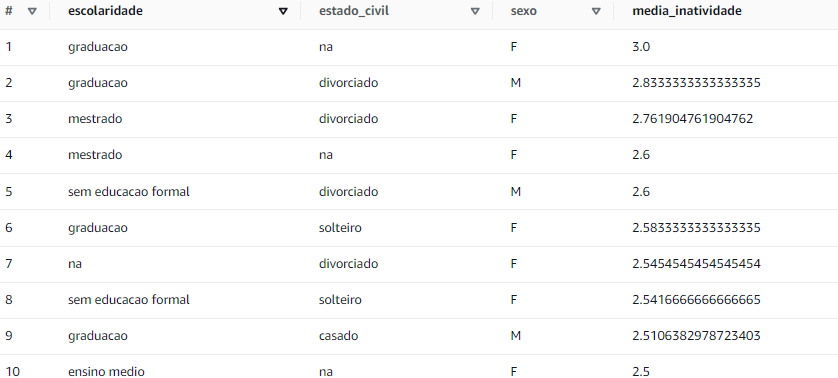

> A escolaridade parece ser um fator que não influencia. Diferente do sexo e estado civil. Os perfis com baixa inatividade parecem ter uma concentração em clientes solteiros, divorciados e na maioria mulheres.


* **5) Segmentação por Escolaridade e Cartão:**

Query:

SELECT escolaridade, tipo_cartao, AVG(valor_transacoes_12m) AS media_valor_transacoes
FROM credito
WHERE escolaridade IS NOT NULL AND tipo_cartao IS NOT NULL AND valor_transacoes_12m IS NOT NULL
GROUP BY escolaridade, tipo_cartao
ORDER BY AVG(valor_transacoes_12m) DESC;

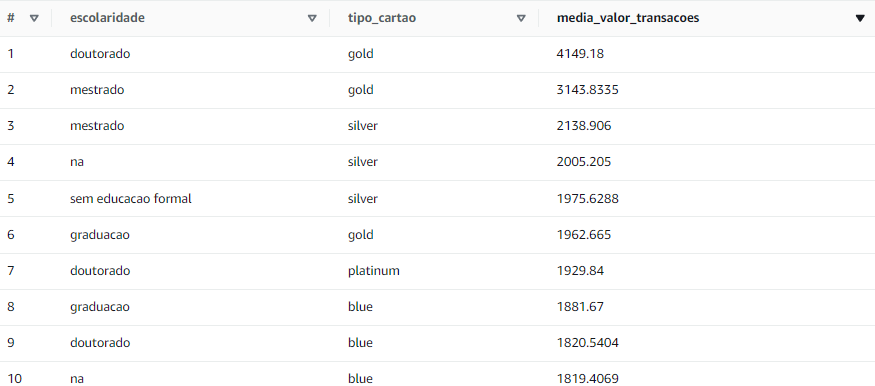

>Os maiores valores de transação não parece ter correlação direta com o nivel de escolaridade do cliente e nem com o tipo do seu cartão. 
 
 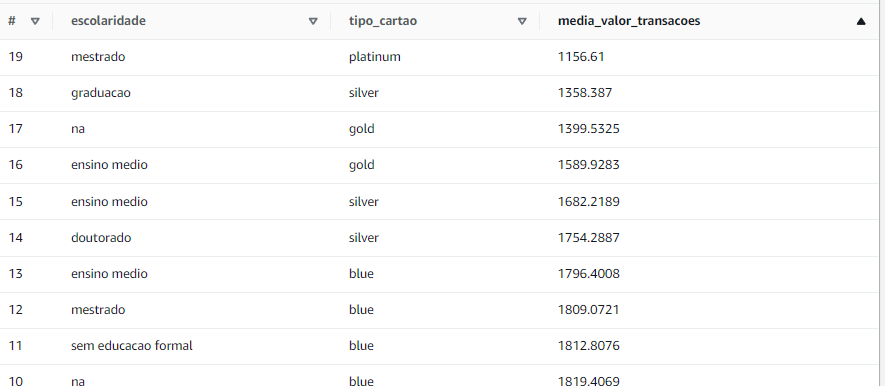
 
 > Isso também se confirma ao reordenarmos os valores de transação em ordem crescente. Não há um padrão.
 
 * **6) Distribuição de Faixas Salariais por Sexo:**
 
 Query:
 
SELECT sexo, salario_anual, COUNT( * ) AS quantidade
FROM credito
WHERE sexo IS NOT NULL AND salario_anual IS NOT NULL
GROUP BY sexo, salario_anual
ORDER BY salario_anual, quantidade DESC;

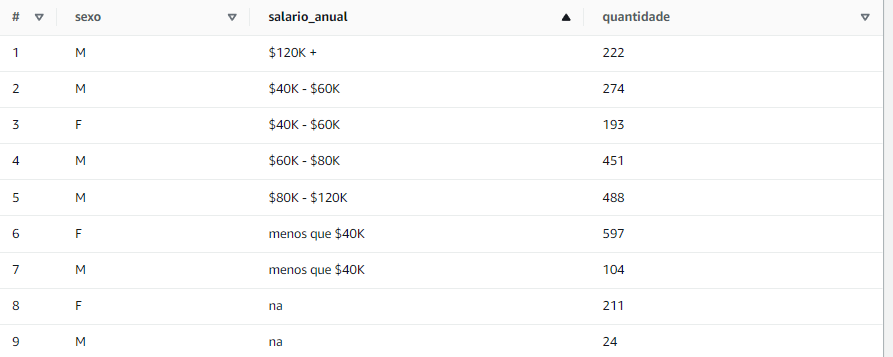

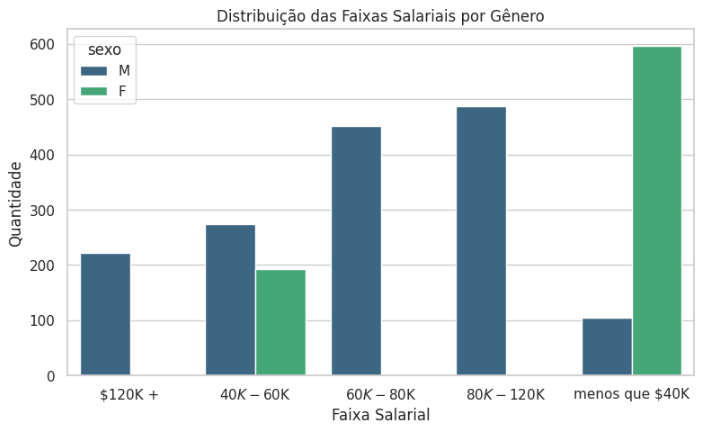

> Em nossa análise, identificamos um dado importante: não há registros de mulheres nos níveis salariais mais altos em nosso banco de dados. Além disso, há uma diferença significativa no número de homens e mulheres que recebem menos de 40 mil, com uma presença expressiva de mulheres nessa faixa salarial. Esses insights sugerem possíveis disparidades de gênero em relação aos salários.

* **7) Correlação entre Número de Dependentes e Limite de Crédito:**

Query:

SELECT dependentes, AVG(limite_credito) AS media_limite
FROM credito
WHERE dependentes IS NOT NULL AND limite_credito IS NOT NULL
GROUP BY dependentes
ORDER BY AVG(limite_credito) DESC;

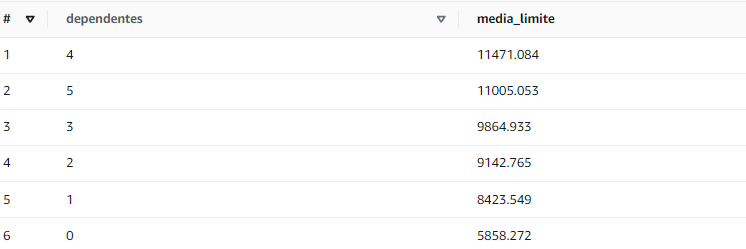

> O número de dependentes parece estar diretamente associado ao limite de crédito concedido: clientes com mais responsabilidades financeiras, como mais dependentes, recebem limites significativamente maiores. Isso sugere que o perfil financeiro desses clientes é considerado mais sólido, justificando uma maior confiança na concessão de crédito.


# Resumo dos Insights Conclusivos
* **1. Limites de Crédito por Escolaridade e Tipo de Cartão:**
Maior escolaridade está associada a limites de crédito mais altos, embora não haja uma concentração específica por nível de escolaridade.
* **2. Gasto Médio Anual por Sexo:**
Não há diferenças significativas nos gastos médios anuais entre homens e mulheres.
* **3. Renda Anual e Número de Produtos:**
Clientes com maior renda anual não compram proporcionalmente mais produtos do banco.
* **4. Grupos mais Inativos:**
Clientes solteiros, divorciados e, predominantemente, mulheres, têm maior inatividade. Escolaridade não afeta a inatividade de maneira significativa.
* **5. Escolaridade e Tipo de Cartão:**
Não há um padrão claro entre escolaridade, tipo de cartão e volume de transações.
* **6. Faixas Salariais por Sexo:**
Mulheres estão ausentes nas faixas salariais mais altas e predominam nas faixas salariais mais baixas, sugerindo uma desigualdade de gênero.
* **7. Número de Dependentes e Limite de Crédito:**
Clientes com mais dependentes recebem limites de crédito mais altos, indicando uma percepção de maior estabilidade financeira.
# Conclusão
A análise revelou padrões importantes sobre limites de crédito, comportamento de gastos e características demográficas dos clientes. Destaca-se que:
* **Disparidades de Gênero:** Há uma clara desigualdade nas faixas salariais, com ausência de mulheres nas categorias mais altas e uma maior concentração nas faixas mais baixas. Isso sugere barreiras estruturais ou discriminação no ambiente de trabalho.
* **Influência da Escolaridade:** Embora o nível de escolaridade afete o limite de crédito, não tem um impacto direto no volume de transações.
* **Relevância de Fatores Demográficos:** O número de dependentes e o estado civil são fatores significativos na concessão de crédito e na inatividade dos clientes.
Esses insights são fundamentais para orientar estratégias mais eficazes em concessão de crédito e marketing, além de promover um ambiente de trabalho mais inclusivo e justo. A análise sugere a necessidade de investigar e abordar as disparidades de gênero para garantir uma maior equidade no ambiente financeiro e laboral.
